Karl Pearson's Measure of Skewness

Dataset: [ 85  88  92  94  96  98 100 100 100 100]
Number of data points: 10

------------------------------------------------------------
STATISTICS
------------------------------------------------------------
Mean:                95.30
Median:              97.00
Mode:                100.00
Standard Deviation:  5.18

------------------------------------------------------------
PEARSON'S SKEWNESS COEFFICIENTS
------------------------------------------------------------
Sk (using Median):   -0.98
Sk (using Mode):     -0.91

------------------------------------------------------------
INTERPRETATION
------------------------------------------------------------
Median-based: Negatively skewed (left-skewed)
Mode-based:   Negatively skewed (left-skewed)

The negative skewness indicates that the tail of the distribution
is longer on the left side, with most scores concentrated on the
right side (higher scores).

Scipy skewness (for verification): -0.78
Note

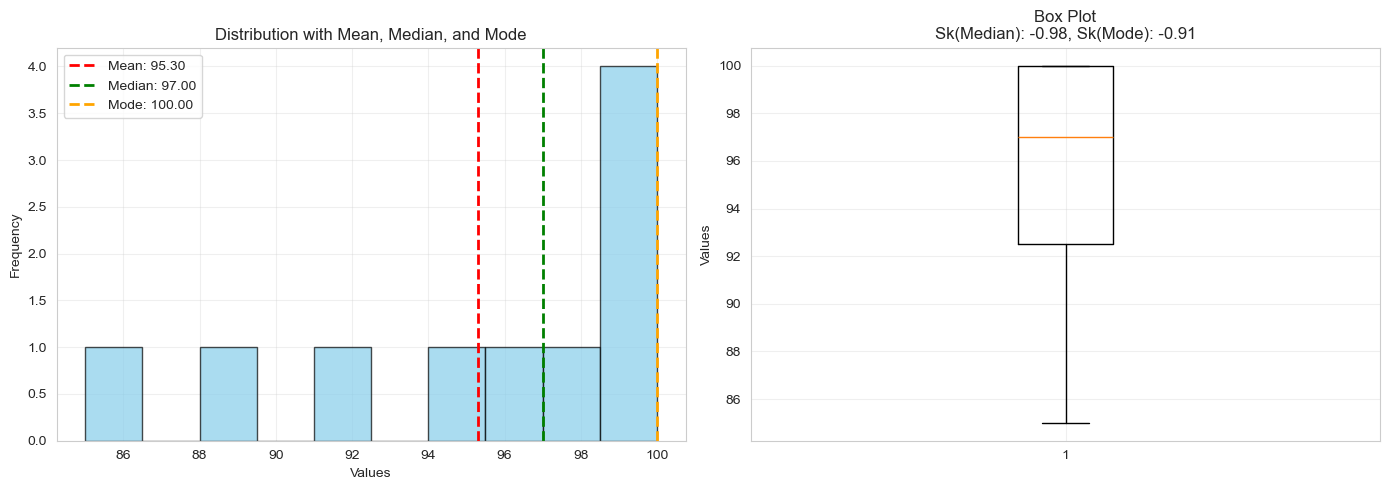


EXAMPLE 2: SYMMETRIC DATASET

Custom Dataset: [10 20 30 40 50 60 70 80 90]

Mean:                50.00
Median:              50.00
Mode:                10.00
Std Dev:             25.82

Sk (Median-based):   0.00
Sk (Mode-based):     1.55

Interpretation:      Symmetric (no skewness)


In [6]:
"""
Karl Pearson's Measure of Skewness

This script demonstrates Karl Pearson's method for calculating skewness
using mean, median/mode, and standard deviation.

Formulas:
    With respect to Mean and Median: Sk = 3 × (Mean − Median) / σ
    With respect to Mean and Mode: Sk = (Mean − Mode) / σ
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


def interpret_skewness(sk):
    """Interpret the skewness coefficient"""
    if sk > 0:
        return "Positively skewed (right-skewed)"
    elif sk < 0:
        return "Negatively skewed (left-skewed)"
    else:
        return "Symmetric (no skewness)"


def calculate_pearson_skewness(data):
    """
    Calculate Pearson's skewness coefficient

    Args:
        data: numpy array of numerical values

    Returns:
        tuple: (sk_median, sk_mode, mean, median, mode, std_dev)
    """
    # Calculate statistics
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data, ddof=0)  # Population standard deviation
    mode_result = stats.mode(data, keepdims=True)
    mode = mode_result.mode[0]

    # Calculate Pearson's skewness coefficients
    sk_median = 3 * (mean - median) / std_dev
    sk_mode = (mean - mode) / std_dev

    return sk_median, sk_mode, mean, median, mode, std_dev


def visualize_distribution(data, mean, median, mode, sk_median, sk_mode):
    """Create visualization of the distribution"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    axes[0].hist(data, bins=10, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0].axvline(mean, color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {mean:.2f}')
    axes[0].axvline(median, color='green', linestyle='--', linewidth=2,
                    label=f'Median: {median:.2f}')
    axes[0].axvline(mode, color='orange', linestyle='--', linewidth=2,
                    label=f'Mode: {mode:.2f}')
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution with Mean, Median, and Mode')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Box plot
    axes[1].boxplot(data, vert=True)
    axes[1].set_ylabel('Values')
    axes[1].set_title(
        f'Box Plot\nSk(Median): {sk_median:.2f}, Sk(Mode): {sk_mode:.2f}')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def main():
    """Main function to demonstrate Pearson's skewness calculation"""

    # Example: Exam Scores Dataset
    print("=" * 60)
    print("Karl Pearson's Measure of Skewness")
    print("=" * 60)

    # Dataset
    data = np.array([85, 88, 92, 94, 96, 98, 100, 100, 100, 100])

    print("\nDataset:", data)
    print("Number of data points:", len(data))

    # Calculate Pearson's skewness
    sk_median, sk_mode, mean, median, mode, std_dev = calculate_pearson_skewness(
        data)

    # Display results
    print("\n" + "-" * 60)
    print("STATISTICS")
    print("-" * 60)
    print(f"Mean:                {mean:.2f}")
    print(f"Median:              {median:.2f}")
    print(f"Mode:                {mode:.2f}")
    print(f"Standard Deviation:  {std_dev:.2f}")

    print("\n" + "-" * 60)
    print("PEARSON'S SKEWNESS COEFFICIENTS")
    print("-" * 60)
    print(f"Sk (using Median):   {sk_median:.2f}")
    print(f"Sk (using Mode):     {sk_mode:.2f}")

    print("\n" + "-" * 60)
    print("INTERPRETATION")
    print("-" * 60)
    print(f"Median-based: {interpret_skewness(sk_median)}")
    print(f"Mode-based:   {interpret_skewness(sk_mode)}")

    if sk_median < 0:
        print("\nThe negative skewness indicates that the tail of the distribution")
        print("is longer on the left side, with most scores concentrated on the")
        print("right side (higher scores).")

    # Verify with scipy
    scipy_skewness = stats.skew(data)
    print(f"\nScipy skewness (for verification): {scipy_skewness:.2f}")
    print("Note: scipy uses moment-based formula which may differ slightly.")

    # Visualize
    print("\nGenerating visualization...")
    visualize_distribution(data, mean, median, mode, sk_median, sk_mode)

    # Example 2: Custom symmetric dataset
    print("\n" + "=" * 60)
    print("EXAMPLE 2: SYMMETRIC DATASET")
    print("=" * 60)

    custom_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
    print("\nCustom Dataset:", custom_data)

    sk_median2, sk_mode2, mean2, median2, mode2, std_dev2 = calculate_pearson_skewness(
        custom_data)

    print(f"\nMean:                {mean2:.2f}")
    print(f"Median:              {median2:.2f}")
    print(f"Mode:                {mode2:.2f}")
    print(f"Std Dev:             {std_dev2:.2f}")
    print(f"\nSk (Median-based):   {sk_median2:.2f}")
    print(f"Sk (Mode-based):     {sk_mode2:.2f}")
    print(f"\nInterpretation:      {interpret_skewness(sk_median2)}")


if __name__ == "__main__":
    main()